In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score


In [2]:
# read preprocessed dataset
df = pd.read_csv(r"C:\Nishanthi\Hope AI\Projects\Depression Detection\Ordered_Formate\2.Data- Preprocessing\Preprocessed_data.csv")

# Split Train and Test data

In [3]:
# Define features and target
X = df[['Social_Weakness','Changes_Habits','Days_Indoors','Mental_Health_History','Gender','Mood_Swings',
         'Occupation_Student','Occupation_Corporate','Occupation_Housewife','Occupation_Others','Work_Interest']]  # Features
y = df['Growing_Stress']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

# Decision Tree Model

In [4]:
# Decision Tree

model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                               max_depth=15, min_samples_split=2, 
                               min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("F1 score:",f1_score(y_test, y_pred))

F1 score: 0.9927102317104921


# Evaluating the model

# Perform Cross-Validation 

In [5]:

from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
print("Cross Validation Result for Best model :", f1_scores)

Cross Validation Result for Best model : [0.99003812 0.99031089 0.99207068 0.98949709 0.98692666]


# Classification Report

In [6]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3554
           1       0.99      0.99      0.99      3839

    accuracy                           0.99      7393
   macro avg       0.99      0.99      0.99      7393
weighted avg       0.99      0.99      0.99      7393



# Confusion Matrix

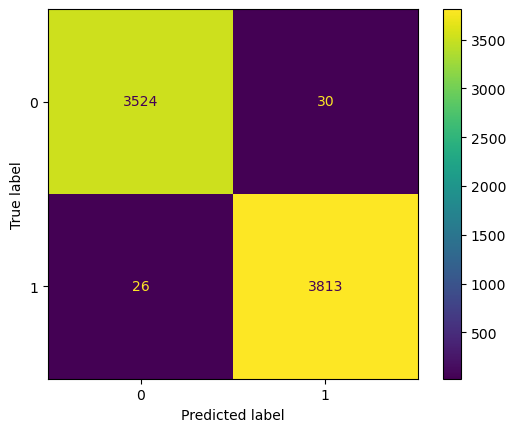

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


# Save model

In [9]:
# save best model  - Decision Tree
import pickle 

pickle.dump(model, open('Depression_detection_model.sav', 'wb'))